In [10]:
import matplotlib.pyplot as plt
import random
import os
import matplotlib.image as mpimg

In [11]:
import cv2

In [12]:
import numpy as np

In [13]:
import math

In [15]:
#IMPORTANT
def resize_img(img,imgh,imgw):
    imgsize=80
    imgwhite=np.ones((imgsize,imgsize,3),np.uint8)*255
    aspectRation=imgh/imgw
    if aspectRation>1:
        k=imgsize/imgh
        #print(k)
        wcal=math.ceil(k*imgw)
        #print(wcal)
        imgresize=cv2.resize(img,(wcal,imgsize))
        #plt.matshow(imgresize)
        imgw=imgresize.shape[1]
        imgh=imgresize.shape[0]
        wgap=math.ceil((imgsize-wcal)/2)
        imgwhite[:,wgap:wcal+wgap]=imgresize

    else:
        k=imgsize/imgw
        hcal=math.ceil(k*imgh)
        imgresize=cv2.resize(img,(imgsize,hcal))
        imgw=imgresize.shape[1]
        imgh=imgresize.shape[0]
        hgap=math.ceil((imgsize-hcal)/2)
        imgwhite[hgap:hcal+hgap,:]=imgresize
    return imgwhite

In [34]:
def load_img(a,b):
    x=[]
    for i in range(1,1501):     #len(os.listdir(r'D:\Sign Language for Numbers\0'))):
        img=cv2.imread(r"D:\Sign Language for Numbers\\"+str(a)+"\\"+str(b)+"_"+str(i)+".jpg")
        try:
            if img!=None:
                imgw=img.shape[1]
                imgh=img.shape[0]
                img=resize_img(img,imgh,imgw)
                x.append(img)
        except:
            imgw=img.shape[1]
            imgh=img.shape[0]
            img=resize_img(img,imgh,imgw)
            x.append(img)
    x1=x[:1200]
    y=x[1200:]
    return (x1,y)
numbers=['zero','one','two','three','four','five','six','seven','eight','nine']
train=[]
test=[]
for i in range(10):
    x,y=load_img(i,numbers[i])
    train.extend(x)
    test.extend(y)

In [17]:
len(test)

2983

In [35]:
def load_img(a,b):
    x=[]
    for i in range(1,1501):     #len(os.listdir(r'D:\Sign Language for Numbers\0'))):
        img=cv2.imread(r"D:\Sign Language for Numbers\\"+str(a)+"\\"+str(b)+str(i)+".jpg")
        try:
            if img!=None:
                imgw=img.shape[1]
                imgh=img.shape[0]
                img=resize_img(img,imgh,imgw)
                x.append(img)
        except:
            imgw=img.shape[1]
            imgh=img.shape[0]
            img=resize_img(img,imgh,imgw)
            x.append(img)
    x1=x[:1200]
    y=x[1200:]
    return (x1,y)
numbers=['U','G','S','M','del','C']
for i in range(10,16):
    x,y=load_img(i,numbers[i-10])
    train.extend(x)
    test.extend(y)

In [19]:
len(train)

18000

In [33]:
len(test)

4483

In [36]:
import numpy as np
train=np.array(train)
test=np.array(test)

In [28]:
train.shape

(18000, 80, 80, 3)

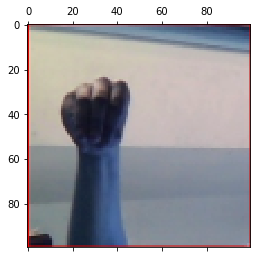

In [15]:
plt.matshow(train[16000])

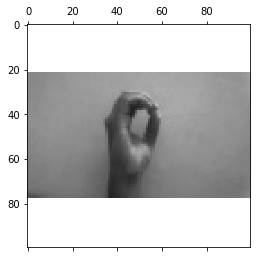

In [12]:
plt.matshow(test[0])

In [29]:
train=train/255
test=test/255

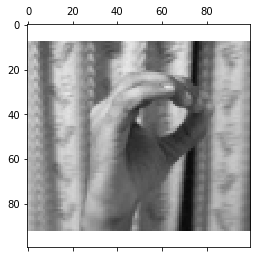

In [14]:
plt.matshow(train[0])

In [15]:
y_train=[]

In [16]:
for i in range(15):
    y_train+=[[i] for _ in range(1200)]
    

In [17]:
len(y_train)

12000

In [18]:
y_train=np.array(y_train).astype(np.int_)

In [37]:
y_test=[[0] for _ in range(283)]
for i in range(1,16):
    y_test+=[[i] for _ in range(300)]
    
y_test=np.array(y_test).astype(np.int_)

In [38]:
y_test.shape

(4783, 1)

In [39]:
model=load_model(r'C:\Users\Lenovo\Downloads\calculator3.h5')

In [40]:
model.evaluate(test,y_test)

150/150 [==============================] - 31s 187ms/step - loss: 1.1687 - accuracy: 0.7376


[1.1686941385269165, 0.7376123666763306]

In [19]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [20]:
from tensorflow.keras import layers, models

In [21]:
inputs=layers.Input(shape=(100, 100, 3))
#Conv2D = 2D Convolution Layer
#here it take 3,3 matrix ususally 
#[[1,1,1],
# [1,-1,1],
# [1,1,1]]     it is basically a loop detection..... in the resultant matrix if it results 1, the desired object is found
#ReLU is applied to convert '-'ve values to 0
c=(layers.Conv2D(128,(3,3),padding='valid',activation='relu'))(inputs)
##MaxPooling2D is a technique to reduce computational complexity
#2,2 filter is used  for getting the max
#2,2 stride is used  for shifting the fliter
m=(layers.MaxPooling2D((2,2),(2,2)))(c)
#padding valid means to without adding additional rows and columns in the output feature map
#size of the output feature map is less than the size of the input data
#reduces the parameters in the model and impoves the computational efficiency
c1=(layers.Conv2D(64,(3,3),padding='valid',activation='relu'))(m)
m1=(layers.MaxPooling2D((2,2),(2,2)))(c1)
c2=(layers.Conv2D(32,(3,3),padding='valid',activation='relu'))(m1)
##MaxPooling2D is a technique to reduce computational complexity
#2,2 filter is used  for getting the max
#2,2 stride is used  for shifting the fliter
m2=(layers.MaxPooling2D((2,2),(2,2)))(c2)
#padding valid means to without adding additional rows and columns in the output feature map
#size of the output feature map is less than the size of the input data
#reduces the parameters in the model and impoves the computational efficiency
c3=(layers.Conv2D(16,(3,3),padding='valid',activation='relu'))(m2)
m3=(layers.MaxPooling2D((2,2),(2,2)))(c3)
#flatten is important because Conv2D works on 2D matrix... needed to be converted into 1D array
f=layers.Flatten()(m3)
#another layer of sigmoid is used
d=layers.Dense(16,activation='sigmoid')(f)
#softmax activation is used in output layer
out=layers.Dense(10,activation='softmax')(d)

In [22]:
model1=models.Model(inputs,out)

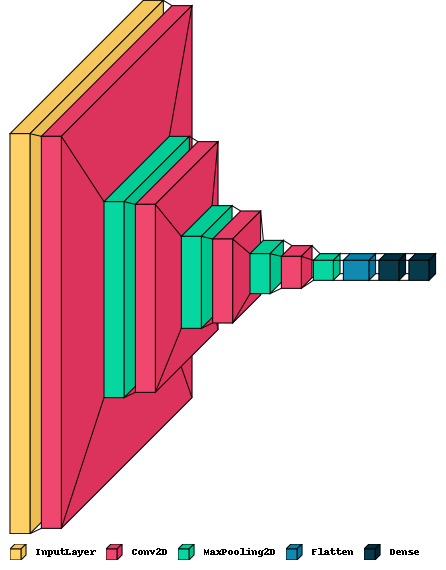

In [23]:
import visualkeras
visualkeras.layered_view(model1, legend=True)

In [24]:
#compliling
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
#training
model1.fit(train,y_train,epochs=10)

Epoch 1/10
375/375 [==============================] - 230s 606ms/step - loss: 2.1324 - accuracy: 0.2314
Epoch 2/10
375/375 [==============================] - 220s 588ms/step - loss: 1.4148 - accuracy: 0.6088
Epoch 3/10
375/375 [==============================] - 231s 617ms/step - loss: 0.9840 - accuracy: 0.7429
Epoch 4/10
375/375 [==============================] - 225s 600ms/step - loss: 0.7329 - accuracy: 0.8144
Epoch 5/10
375/375 [==============================] - 216s 576ms/step - loss: 0.5624 - accuracy: 0.8553
Epoch 6/10
375/375 [==============================] - 215s 573ms/step - loss: 0.4564 - accuracy: 0.8823
Epoch 7/10
375/375 [==============================] - 219s 585ms/step - loss: 0.3758 - accuracy: 0.9013
Epoch 8/10
375/375 [==============================] - 248s 661ms/step - loss: 0.3125 - accuracy: 0.9210
Epoch 9/10
375/375 [==============================] - 351s 935ms/step - loss: 0.2718 - accuracy: 0.9304
Epoch 10/10
375/375 [==============================] - 358s 955m

In [26]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        18464 

In [27]:
model1.evaluate(train,y_train)

375/375 [==============================] - 107s 260ms/step - loss: 0.2394 - accuracy: 0.9352


[0.2393798828125, 0.9351666569709778]

In [28]:
model1.save('project.h5')

In [29]:
y_test=[[0] for _ in range(283)]

In [30]:
for i in range(1,10):
    y_test+=[[i] for _ in range(300)]
    

In [31]:
test.shape

(2983, 100, 100, 3)

In [33]:
y_test=np.array(y_test).astype(np.int_)

In [34]:
y_test.shape

(2983, 1)

In [35]:
model1.evaluate(test,y_test)

94/94 [==============================] - 24s 250ms/step - loss: 0.6211 - accuracy: 0.7814


[0.6211187243461609, 0.7814280986785889]

In [36]:
predict=model1.predict(test)

94/94 [==============================] - 24s 258ms/step


In [64]:
np.argmax(predict[2930])

9

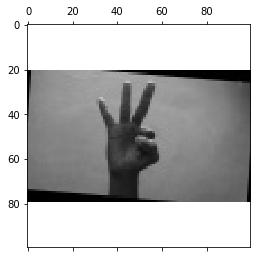

In [63]:
plt.matshow(test[2930])

In [65]:
y_test[2930]

array([9])

In [96]:
#!pip install cvzone
#!pip uninstall mediapipe
#!pip install opencv-contrib-python
#!pip install msvc-runtime

^C


In [1]:
import mediapipe

In [1]:
import cv2
import math

In [2]:
from cvzone.HandTrackingModule import HandDetector

In [3]:
from tensorflow.keras.models import load_model

In [4]:
model=load_model(r'C:\Users\Lenovo\Downloads\calculator3.h5')

In [5]:
import time

In [6]:
def prediction(img):
    m=resize_img(img,len(img),len(img[0]))
    m=m/255
    m=np.array([m])
    s=model.predict(m,verbose=0)
    return np.argmax(s)
    
    

In [41]:
cap=cv2.VideoCapture(0)
detector=HandDetector(maxHands=1)

offset=20
imgsize=80
prev=time.time()
k=[]
string=''
while True:
    success,img=cap.read()
    hands,img=detector.findHands(img)
    if hands:
        hand=hands[0]
        x,y,w,h=hand['bbox']
        
        imgCrop=img[y-offset:y+h+offset,x-offset:x+w+offset]
        
        '''
        aspectRation=h/w
        if aspectRation>1:
            k=imgsize/h
            #print(k)
            wcal=math.ceil(k*w)
            #print(wcal)
            imgresize=cv2.resize(imgCrop,(wcal,imgsize))
            #plt.matshow(imgresize)
            imgw=imgresize.shape[1]
            imgh=imgresize.shape[0]
            wgap=math.ceil((imgsize-wcal)/2)
            imgwhite[:,wgap:wcal+wgap]=imgresize

        else:
            k=imgsize/w
            hcal=math.ceil(k*h)
            imgresize=cv2.resize(imgCrop,(imgsize,hcal))
            imgw=imgresize.shape[1]
            imgh=imgresize.shape[0]
            hgap=math.ceil((imgsize-hcal)/2)
            imgwhite[hgap:hcal+hgap,:]=imgresize
        
        '''
        cur=time.time()
        if cur-prev>3:
            prev=cur
            result=prediction(imgCrop)
            if len(string)!=0 and result==0:
                if string[len(string)-1] in ['+','-','*','/']:
                    pass
                else:
                    string+=str(result)
            elif string=='' and (result==0 or result==10 or result==11 or result==12 or result==13):
                string=''
            elif result==10:
                string+='+'
            elif result==11:
                string+='-'
            elif result==12:
                string+='*'
            elif result==13:
                string+='/'
            elif string=='' and result==14:
                string=''
            elif string!='' and result==14:  #DELETE
                string=string[:len(string)-1]
            elif string=='' and result==15:
                string=''
                print("No output")
                break
            elif string!='' and result==15:  #DELETE
                valid=input("Enter 's' if you want to calculate or press any key to continue: ")
                if valid=='s':
                    print(eval(string))
                    break
                else:
                    pass
            else:
                string+=str(result)
            print(string)
        cv2.imshow("Imgae Crop",imgCrop)
    cv2.imshow("Imgae",img)
    cv2.waitKey(1)

4
49
490
4905
49054
490544
4905440
4905440/
4905440/4
4905440/40
4905440/400
4905440/4000
4905440/40000
4905440/400000
4905440/4000000
4905440/40000000
4905440/400000000
4905440/4000000000
4905440/40000000000
4905440/400000000000
4905440/4000000000000
4905440/40000000000003
4905440/400000000000035
4905440/4000000000000354
4905440/40000000000003542
4905440/400000000000035423
4905440/4000000000000354233
4905440/40000000000003542333
4905440/400000000000035423339
4905440/400000000000035423339+
4905440/400000000000035423339
4905440/40000000000003542333
4905440/4000000000000354233
Enter 's' if you want to calculate or press any key to continue: 
4905440/4000000000000354233
4905440/40000000000003542333
4905440/4000000000000354233
4905440/400000000000035423
4905440/40000000000003542
4905440/4000000000000354
4905440/400000000000035
4905440/4000000000000350
4905440/400000000000035
4905440/40000000000003
4905440/4000000000000
4905440/400000000000
4905440/40000000000
Enter 's' if you want to calcu

In [42]:
cap.release

<function VideoCapture.release>

In [43]:
cv2.destroyAllWindows()